<h2>Part 2: Linear Regression on MPG Data</h2>
The goal is to use linear regression to predict MPG( Miles Per Gas) of cars. Also the data will be explored to get information such as correlations between the attributes.
<lu>
<li>Use scikit-learn</li>
<li>Implement analytical solution (normal equation) to obtain weights</li>
<li>Implement numerical solution (gradient descent) to obtain weights</li>
</lu>
   

In [25]:
import matplotlib
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd
import numpy as np

In [26]:
# Load CSV and columns
data = pd.read_csv("mpg.csv", index_col=0)

In [27]:
# show a quick description of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 8 to 4
Data columns (total 7 columns):
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
model_year      392 non-null int64
origin          392 non-null int64
mpg             392 non-null float64
dtypes: float64(3), int64(4)
memory usage: 24.5 KB


382 Entries exist and we can wee that there are no null values. Null values are manually removed.

In [28]:
# display the first 5 rows in the data
data.head()

,displacement,horsepower,weight,acceleration,model_year,origin,mpg
cylinders,,,,,,,
8,307.0,130,3504,12.0,70,1,18.0
8,350.0,165,3693,11.5,70,1,15.0
8,318.0,150,3436,11.0,70,1,18.0
8,304.0,150,3433,12.0,70,1,16.0
8,302.0,140,3449,10.5,70,1,17.0


In [29]:
# show a summary of the numerical attributes
data.describe()

,displacement,horsepower,weight,acceleration,model_year,origin,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,23.445918
std,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,7.805007
min,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,17.000000
50%,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,22.750000
75%,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,29.000000
max,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


The attributes are self-explanatory. 50% of the cars have a MPG lower than 22.75.

In [30]:
# check the shape of the data
np.shape(data)

(392, 7)

In [31]:
# visualize data
import matplotlib.pyplot as plt
# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

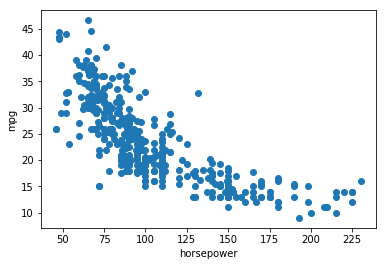

In [32]:
plt.scatter(x=data['horsepower'], y=data['mpg'])
plt.ylabel('mpg')
plt.xlabel('horsepower')
plt.show()

There is a strong correlation between horse power and mpg. The higher horsepower, the lower mpg.


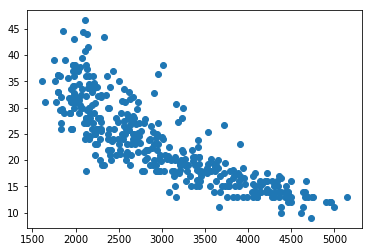

In [33]:
plt.scatter(x=data['weight'], y=data['mpg'])

Obviously, heavier cars will have lower MPG.

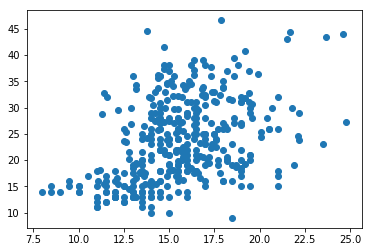

In [34]:
plt.scatter(x=data['acceleration'], y=data['mpg'])

Cars with higher acceleration tend to have higher MPG.

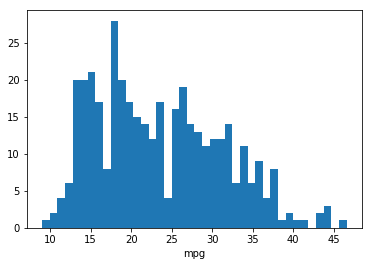

In [35]:
plt.hist(x=data['mpg'], bins = 40)
plt.xlabel('mpg')
plt.show()

This histogram indicates that most cars have the MPG value between 13 and 30. 

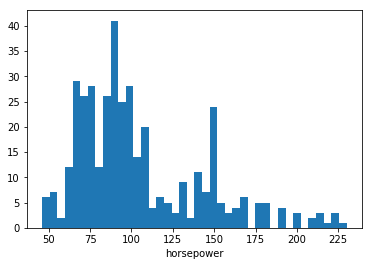

In [36]:
plt.hist(x=data['horsepower'], bins = 40)
plt.xlabel('horsepower')
plt.show()

The majority of the cars in our dataset have the horsepower between 60 and 120

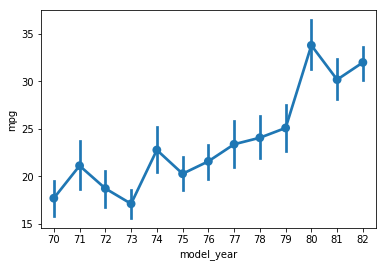

In [37]:
import seaborn as sns
sns.pointplot(x='model_year', y='mpg', data=data)

This graph indicates that new cars tend to have a better mpg compared to the cars that were built in the past.

In [38]:
# Prepare X and Y
X = data[['horsepower', 'weight', 'acceleration']]
y = data['mpg']

3 features(horserpower, weight, and acceleration) will be used to determine the f(x).

In [39]:
# sample data of X
X.head()

,horsepower,weight,acceleration
cylinders,,,
8,130,3504,12.0
8,165,3693,11.5
8,150,3436,11.0
8,150,3433,12.0
8,140,3449,10.5


In [40]:
# sample data of Y
y.head()

cylinders
8    18.0
8    15.0
8    18.0
8    16.0
8    17.0
Name: mpg, dtype: float64

In [41]:
# Split X and y into training and testing sets
# import  
from sklearn.cross_validation import train_test_split
train_data,test_data,train_target,test_target  = train_test_split(X, y, random_state=1)
print(np.shape(test_target))
print(np.shape(test_data))
#train_data,test_data,train_target,test_target 

(98,)
(98, 3)


In [42]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate the linear regression model
lm = LinearRegression()

# fit the model to the training data
lm.fit(train_data, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
# Task 1-2: show intercept and coefficents
print ('intercept: ', lm.intercept_)
print ('coefficient', lm.coef_)

intercept:  42.232103077150654
coefficient [-0.03916143 -0.00569037  0.12536131]


In [44]:
# show errors on training dataset and testing dataset
print ("\n Mean Sqaured Error(training data): %.2f" 
      % ( np.mean( (lm.predict(train_data) - train_target) **2) / 2))
      # % ( np.mean( (regrModel.predict(train_data) - train_target) **2) / 2))

print ("\n Mean Sqaured Error(test data): %.2f" 
      % ( np.mean( (lm.predict(test_data) - test_target) **2) / 2))
     # % ( np.mean( (regrModel.predict(test_data) - test_target) **2) / 2))



 Mean Sqaured Error(training data): 8.81

 Mean Sqaured Error(test data): 9.63


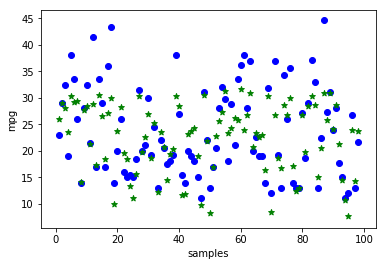

In [45]:
# x-axis will be the number of samples
counter = []
for i in range(1, len(test_data) + 1): 
    counter.append([i])

# create a scatter plot    
plt.scatter(counter, test_target, color = 'blue', marker = 'o')
plt.scatter(counter, lm.predict(test_data), color = 'green', marker = '*')
plt.ylabel('mpg')
plt.xlabel('samples')
plt.show ()